<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/dev/Lesson_21_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import load_diabetes
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Загрузка данных
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/BostonHousing.csv')

Mounted at /content/drive


In [3]:
# Выбор признаков и целевой переменной
X = df.iloc[:, [0, 1, 2, 4, 5, 6, 8, 9, 10, 12]].values
y = df.iloc[:, 13].values

In [4]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [5]:
# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Создание и обучение модели на основе ансамбля деревьев решений.
rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [16]:
# Предсказание
y_pred = rf_model.predict(X_test)

In [17]:
# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 19.55
MAE: 2.89


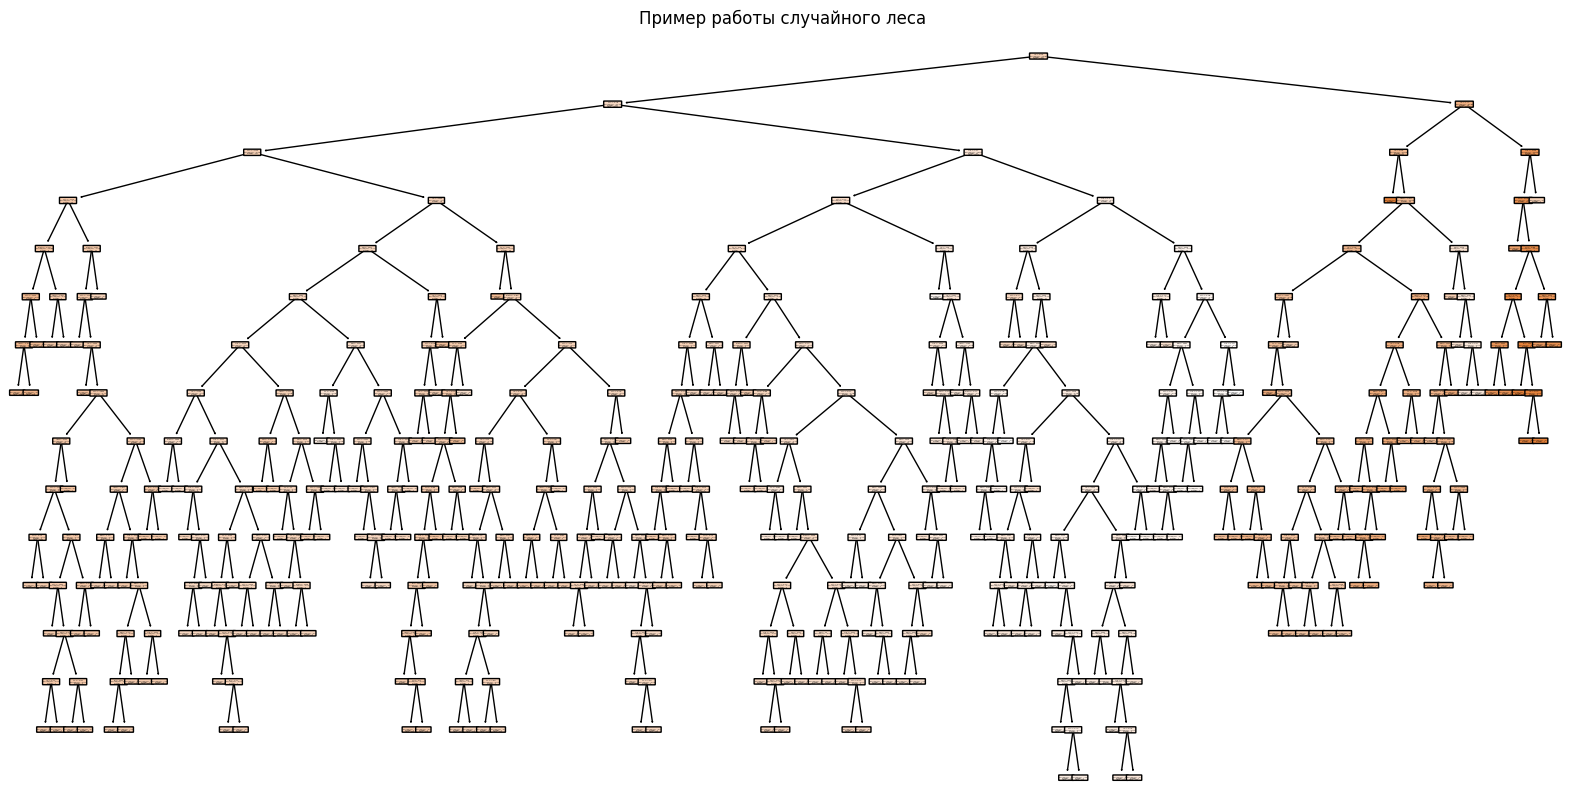

In [18]:
# Построение одного из деревьев решений
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=df.columns[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12]], rounded=True)
plt.title('Пример работы случайного леса ')
plt.show()

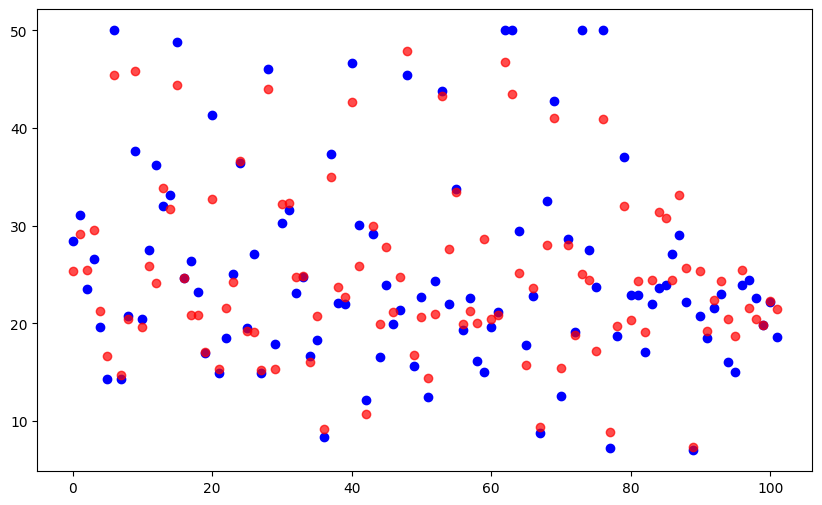

In [19]:
# Визуализация истинных и предсказанных значений
indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.scatter(indices, y_test, color='blue', label='Истинные значения')
plt.scatter(indices, y_pred, color='red', label='Предсказанные значения', alpha=0.7)

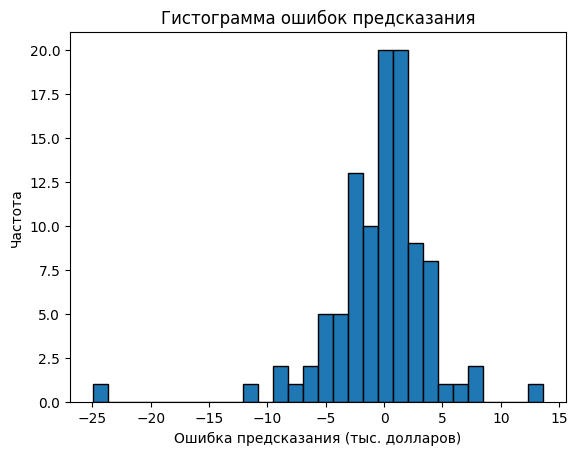

In [20]:
# Построение гистограммы ошибок
errors = y_pred - y_test
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Ошибка предсказания (тыс. долларов)')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок предсказания')
plt.show()